Eleanor Alarcón Neri - A01665593

Emma Sofia Aparicio Rodriguez - A01666223
# **Heatmaps and Boxplots**

This document aims to analyze the relative variability in the estimated ART coverage among living with HIV. This variability is calculated as the difference between the minimum and medium estimated numbers. Through various visualizations such as box plots, histograms, and heatmaps, we seek to identify trends, patterns, and even inconsistencies.

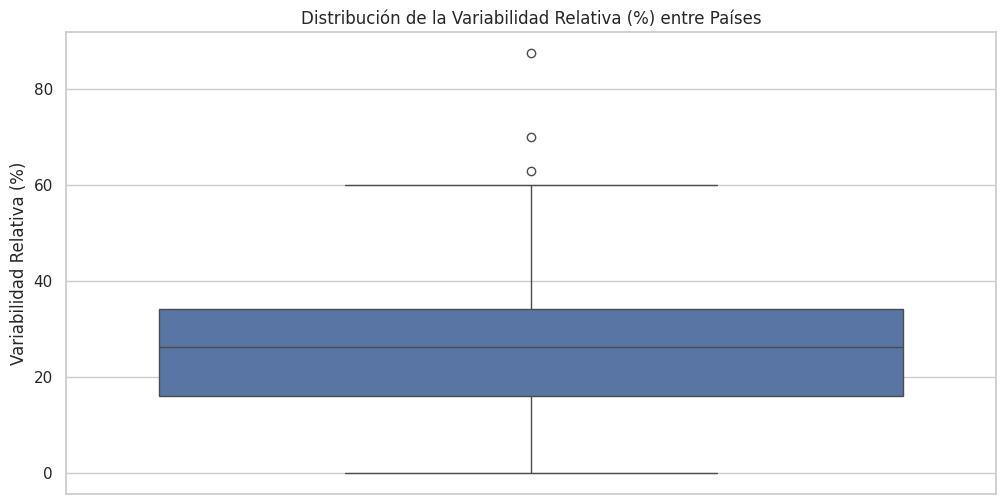

In [ ]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Read the data
df = pd.read_csv("https://github.com/emmasofiaar/arte_analitica/raw/refs/heads/main/art_pediatric_coverage_by_country_clean.csv")
#We obtain de variability
df["Variabilidad_relativa"] = ((df["Estimated ART coverage among children (%)_median"] - df["Estimated ART coverage among children (%)_min"]) / df["Estimated ART coverage among children (%)_min"]) * 100
#Detele all null spaces
df_filtered = df.dropna(subset=["Variabilidad_relativa"])
sns.set(style="whitegrid")

#Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(y=df_filtered["Variabilidad_relativa"])
plt.title("Distribución de la Variabilidad Relativa (%) entre Países")
plt.ylabel("Variabilidad Relativa (%)")
plt.show()

2. Histogram

The histogram reveals how relative variability is distributed among the countries.
Most countries exhibit low relative variability, with a peak around 25-30%.
As variability increases, frequency decreases, indicating that few countries have highly uncertain estimates.
Some countries show extreme variability of around 80%, suggesting the issues in data collection or differences in estimation in the methodologie used

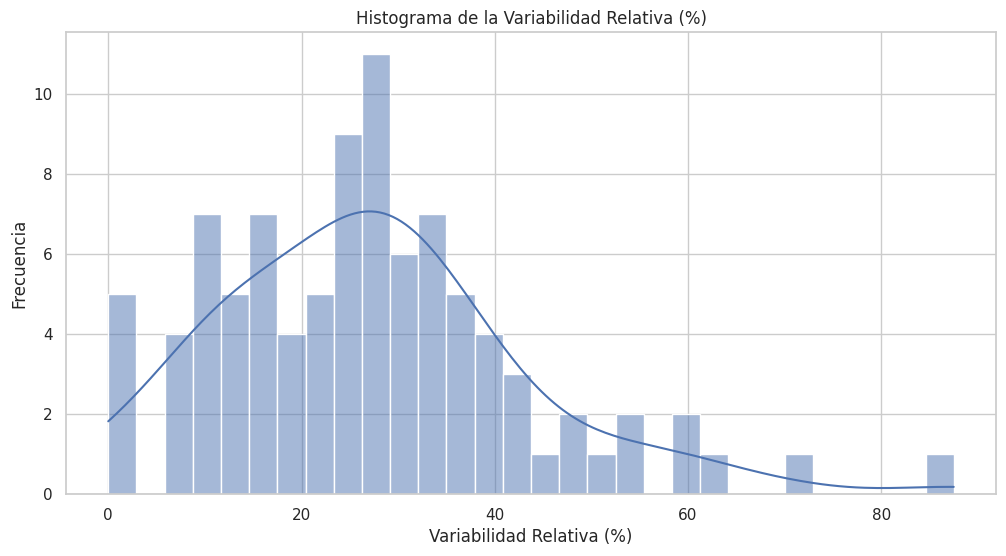

In [ ]:
#Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered["Variabilidad_relativa"], bins=30, kde=True)
plt.title("Histograma de la Variabilidad Relativa (%)")
plt.xlabel("Variabilidad Relativa (%)")
plt.ylabel("Frecuencia")
plt.show()

3. Heat Map

This heatmap visually represents the correlation between three variables related to ART (Antiretroviral Therapy) coverage among children

There is a strong correlation (0.98) between Estimated ART coverage among children (%)_median and Estimated ART coverage among children (%)_min, indicating that minimum and medium estimates are closely related.


However, Relative Variability has a negative correlation (-0.48) with the minimum ART coverage, meaning that countries with higher ART coverage estimates tend to have more reliable data, while those with lower coverage show greater uncertainty. This suggests that data collection challenges or inconsistent reporting methods may contribute to variability in estimates, particularly in countries with limited healthcare infrastructure.

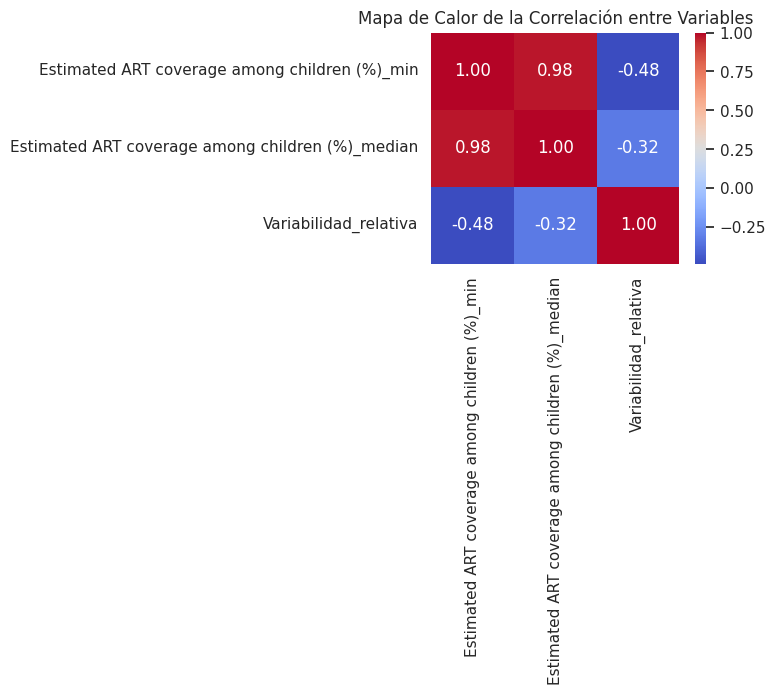

In [7]:
correlation_matrix = df_filtered[["Estimated ART coverage among children (%)_min", "Estimated ART coverage among children (%)_median", "Variabilidad_relativa"]].corr()
# Heat map
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de la Correlación entre Variables")
plt.show()

**CONCLUSION**

1. Are there any variables that do not provide information?

Some of the variables may not contribute a lot to the analysis if they have low variance or high correlation with other variables. Based on the heatmap, the Estimated ART coverage among children min and median are highly correlated, meaning they provide nearly identical information. If one is removed, the overall analysis might remain unchanged. The new variable variabilidad relativa has no correlation with the other variables, but it is the main focus of the analysis, so it is still useful. However the rest of the variables in the database are not used and they do no provide information for this specific analysis.

2. If you had to eliminate variables, which ones would you remove and why?

We would delete variables such as  Estimated number of children needing ART based on WHO methods, Estimated ART coverage among children (%), Estimated number of children needing ART based on WHO methods_median, Estimated number of children needing ART based on WHO methods_min, Estimated number of children needing ART based on WHO methods_max, Estimated ART coverage among children (%)_max since they do not apport anything to this. Removing any of this would simplify the dataset without losing meaningful insights.


3. Are there any variables with unusual data?

No, all the data from the dataset is constant and the variability between them is not a high number so we could say it stays constant and its not unusual.

4. If you compare the variables, are they all in similar ranges?

No, the relative variability varies significantly across countries. Some have low variability (~25-30%), while others exceed may get close to (80%). This range difference suggests that some estimates are more reliable than others.

5. Do you think this affects the data analysis?

Yes, large differences in variability can skew interpretations. If certain countries have high uncertainty, their data might not be directly comparable to countries with more stable estimates. This could lead to misleading conclusions if not accounted for.
6. Can you find any similar groups? What are these groups?

Low variability group: Mostly European and developed countries, the estimates are more consistent and it indicates that the collection of the data is easier.

Intermediate variability group: Countries with moderate uncertainty, possibly due to differences in estimation methodologies rather than data collection issues.

High variability group: African and Latin American countries, where data collection challenges might lead to extreme variability  that may be due to differences in measurement methodologies or challenges in data collection.

**GITHUB LINK**

https://github.com/aneleanor/Mastering_Analytics

https://github.com/emmasofiaar/arte_analitica